In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import glob


In [132]:
#complete code with list
#input files for all spectra (for testing just one file)
#data_name_list=["Test1","Test2","Test3"] #this would later be the file name
#data_file_list=["spectrum.pl","spectrum.pl","spectrum.pl"]
data_file_list=glob.glob('./spectral_Data/spectras/*')
#initilize empty list for ease of sorting:
sorted_file_list = [None]*(len(data_file_list))
print(len(sorted_file_list), len(data_file_list))
for i in range(0,len(data_file_list)):
    #isolate the number from the file name
    run_number_from_file=int(data_file_list[i].split("spectrum")[1].split(".")[0])
    #print(i, run_number_from_file)
    
    #take the position in the sorted list based on the run number from the file name at position i 
    #(should be quite quick)
    sorted_file_list[run_number_from_file]=data_file_list[i]
    
#print(sorted_file_list)    

729 729


In [133]:
df_test_list=[] #list for df later
test_list_num_peaks=[]
for data_file in sorted_file_list:
    #print(data_file)
    df = pd.read_csv(data_file[2:],sep="   ",header =2,engine='python')
    df=df.dropna(1) #remove all na entrys
    df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, 
              inplace=True) 
    #make new column for all maximum values
    #get all peaks
    test_list_num_peaks.append(min([len((find_peaks(df.g1.values)[0]))]))
    df['max']=df.iloc[find_peaks(df.g1.values)[0]   ]['g1'].dropna()
    #append new Datafiles which have only the energy and the intensity
    
    test_max=df.nlargest(1,'max')
    print(test_max)
    df_test_list.append(df.nlargest(1,'max'))
 #   df_test_list.append(pd.DataFrame(zip(df['Energy'][df.nlargest(5,'max',keep='first').index],
 #                                        df['max'].dropna().nlargest(5,'g1')), 
 #                                                          columns=["Energy","Intensity"]))

#concat all these datafiles
#for ease of use each file can be given a data name
sorted_keys=[sorted_file.split('spectras\\')[1].split(".")[0] for sorted_file in sorted_file_list ]

df_results = pd.concat(df_test_list)#, keys=sorted_keys)
#print(test_list_num_peaks)
#print(min(test_list_num_peaks))

     Energy        g1        g2        g3       max
874   0.748  7.858334  7.700694  7.559162  7.858334
     Energy        g1         g2         g3       max
213  -0.574  23.84354  23.034622  22.368476  23.84354
     Energy        g1       g2        g3       max
866   0.732  7.943941  7.80184  7.664835  7.943941
     Energy        g1        g2        g3       max
867   0.734  7.742171  7.611813  7.489364  7.742171
     Energy         g1         g2         g3        max
220   -0.56  23.837041  22.973491  22.269023  23.837041
     Energy        g1        g2        g3       max
867   0.734  7.755045  7.623131  7.498659  7.755045
     Energy        g1       g2        g3       max
866   0.732  7.945592  7.80255  7.665184  7.945592
     Energy         g1         g2        g3        max
213  -0.574  23.783474  22.990402  22.33523  23.783474
     Energy        g1        g2        g3       max
874   0.748  7.884468  7.723106  7.578042  7.884468
     Energy         g1        g2         g3       

185   -0.63  29.983313  28.920004  28.045695  29.983313
     Energy        g1        g2        g3       max
123  -0.754  1.612197  1.509202  1.427109  1.612197
     Energy          g1          g2          g3         max
731   0.462  390.275646  376.093986  364.569089  390.275646
     Energy        g1        g2       g3       max
122  -0.756  0.674298  0.652253  0.63413  0.674298
     Energy        g1        g2        g3       max
122  -0.756  0.648399  0.629915  0.614634  0.648399
     Energy          g1          g2          g3         max
731   0.462  392.963517  378.619115  366.974829  392.963517
     Energy        g1        g2        g3       max
122  -0.756  0.648399  0.629915  0.614634  0.648399
     Energy        g1        g2       g3       max
122  -0.756  0.674298  0.652254  0.63413  0.674298
     Energy          g1          g2          g3         max
731   0.462  390.275647  376.093986  364.569089  390.275647
     Energy        g1      g2        g3       max
123  -0.754  1.612

962   0.924  58.052315  55.934308  54.216748  58.052315
     Energy         g1         g2         g3        max
733   0.466  27.568176  26.682504  25.969421  27.568176
     Energy         g1         g2         g3        max
734   0.468  27.446882  26.594346  25.903329  27.446882
     Energy         g1         g2         g3        max
963   0.926  53.015955  51.399016  50.084296  53.015955
     Energy         g1         g2         g3        max
588   0.176  24.993872  24.119321  23.416427  24.993872
     Energy        g1        g2        g3       max
866   0.732  8.401007  8.191946  8.007911  8.401007
     Energy         g1         g2         g3        max
209  -0.582  23.228739  22.416053  21.758423  23.228739
     Energy        g1        g2        g3       max
865    0.73  8.185994  8.014113  7.854962  8.185994
     Energy        g1        g2        g3       max
865    0.73  8.087222  7.926772  7.775252  8.087222
     Energy         g1         g2         g3        max
211  -0.578  23.

865    0.73  8.138106  7.978275  7.827409  8.138106
     Energy         g1         g2         g3        max
207  -0.586  23.416456  22.584196  21.909239  23.416456
     Energy        g1        g2        g3       max
865    0.73  8.138106  7.978275  7.827409  8.138106
     Energy        g1        g2        g3       max
865    0.73  8.261006  8.072729  7.902779  8.261006
     Energy         g1         g2        g3        max
214  -0.572  23.625643  22.827281  22.17997  23.625643
     Energy        g1        g2        g3       max
866   0.732  8.667713  8.415202  8.203005  8.667713
     Energy        g1        g2        g3       max
866   0.732  8.560536  8.327393  8.128172  8.560536
     Energy         g1        g2         g3        max
213  -0.574  23.229288  22.44028  21.799759  23.229288
     Energy        g1        g2        g3       max
865    0.73  8.332924  8.135009  7.958304  8.332924
     Energy        g1        g2        g3       max
865    0.73  8.243708  8.070689  7.909917  8

289  -0.422  78.284154  75.464458  73.17267  78.284154
     Energy         g1         g2         g3        max
184  -0.632  29.224543  28.187315  27.344606  29.224543
     Energy         g1         g2         g3        max
184  -0.632  32.529796  31.200136  30.140955  32.529796
     Energy         g1         g2         g3        max
288  -0.424  75.673938  73.081129  70.970774  75.673938
     Energy         g1         g2         g3        max
185   -0.63  30.212912  29.124891  28.241608  30.212912
     Energy         g1         g2         g3        max
185   -0.63  30.122801  29.041947  28.164525  30.122801
     Energy         g1         g2       g3        max
290   -0.42  77.866972  75.295072  73.1934  77.866972
     Energy         g1         g2         g3        max
185   -0.63  30.122802  29.041948  28.164525  30.122802
     Energy         g1       g2         g3        max
185   -0.63  30.212925  29.1249  28.241614  30.212925
     Energy         g1         g2         g3        max
2

865    0.73  8.243708  8.070689  7.909917  8.243708
     Energy        g1        g2        g3       max
865    0.73  8.332924  8.135009  7.958304  8.332924
     Energy         g1        g2         g3        max
213  -0.574  23.229288  22.44028  21.799759  23.229288
     Energy        g1        g2        g3       max
866   0.732  8.559767  8.325822  8.126672  8.559767
     Energy        g1         g2         g3       max
735    0.47  27.84824  26.998792  26.316751  27.84824
     Energy         g1         g2         g3        max
962   0.924  60.433369  58.106214  56.214522  60.433369
     Energy         g1         g2         g3        max
736   0.472  28.864897  27.952094  27.216005  28.864897
     Energy         g1         g2         g3        max
733   0.466  27.731724  26.834107  26.115693  27.731724
     Energy         g1         g2         g3        max
963   0.926  57.459764  55.366493  53.668668  57.459764
     Energy         g1         g2         g3        max
733   0.466  27.73

962   0.924  57.817211  55.671217  53.936019  57.817211
     Energy         g1         g2         g3        max
733   0.466  27.526536  26.644326  25.933993  27.526536
     Energy         g1         g2         g3        max
733   0.466  27.554762  26.672531  25.960965  27.554762
     Energy         g1         g2        g3        max
962   0.924  57.884601  55.778294  54.06916  57.884601
     Energy         g1         g2         g3        max
734   0.468  27.541991  26.661042  25.959465  27.541991
     Energy        g1        g2        g3       max
866   0.732  8.426666  8.208691  8.019056  8.426666
     Energy         g1         g2         g3        max
217  -0.566  20.582699  19.905693  19.352592  20.582699
     Energy        g1        g2        g3       max
865    0.73  8.321659  8.132797  7.962335  8.321659
     Energy        g1        g2        g3       max
866   0.732  7.949636  7.783961  7.635801  7.949636
     Energy         g1         g2         g3        max
211  -0.578  23.45

185   -0.63  30.149654  29.068449  28.191104  30.149654
     Energy         g1         g2        g3        max
185   -0.63  30.079182  29.003147  28.13048  30.079182
     Energy         g1         g2         g3        max
284  -0.432  73.651991  70.987278  68.831289  73.651991
     Energy         g1         g2         g3        max
186  -0.628  29.335702  28.294679  27.447672  29.335702
     Energy         g1         g2        g3        max
186  -0.628  29.661714  28.579957  27.70291  29.661714
     Energy         g1         g2         g3        max
288  -0.424  79.204427  76.309992  73.959181  79.204427
     Energy         g1        g2         g3        max
185   -0.63  29.958261  28.88025  28.005993  29.958261
     Energy         g1         g2         g3        max
185   -0.63  29.989818  28.913861  28.040219  29.989818
     Energy         g1         g2         g3        max
280   -0.44  63.280922  61.154265  59.439582  63.280922
     Energy         g1         g2         g3        ma

     Energy         g1         g2         g3        max
212  -0.576  24.899928  23.975704  23.229611  24.899928
     Energy        g1        g2        g3       max
868   0.736  8.654306  8.386023  8.164605  8.654306
     Energy         g1         g2         g3        max
755    0.51  13.436128  13.115912  12.861947  13.436128
     Energy         g1         g2         g3        max
961   0.922  57.337581  55.299582  53.632551  57.337581
     Energy         g1         g2         g3        max
733   0.466  27.273718  26.408067  25.711299  27.273718
     Energy         g1         g2         g3        max
591   0.182  27.369606  26.384418  25.582185  27.369606
     Energy         g1         g2         g3        max
986   0.972  27.984053  27.072599  26.336497  27.984053
     Energy         g1         g2         g3        max
591   0.182  27.368959  26.384128  25.582042  27.368959
     Energy         g1         g2         g3        max
733   0.466  27.573698  26.637975  25.893251  27.573698


In [134]:
df_reduced_results=df_results.drop(columns=["g1","g2","g3"])
df_reduced_results.head(10)

,Energy,max
874,0.748,7.858334
213,-0.574,23.843540
866,0.732,7.943941
867,0.734,7.742171
220,-0.560,23.837041
867,0.734,7.755045
866,0.732,7.945592
213,-0.574,23.783474
874,0.748,7.884468
755,0.510,13.528294


In [135]:
#load data inputs from file
df_data_inputs = pd.read_csv("spectral_Data/all_729_configuration.txt",sep=";",engine='python')


df_concoctate=pd.concat([df_reduced_results.reset_index(),df_data_inputs],axis=1).drop(columns="index").rename(columns={"max":"Intensity"})
#normalize data
get_max_intensity=max(df_concoctate["Intensity"])
print(get_max_intensity)
df_concoctate["Intensity"]=df_concoctate["Intensity"]/get_max_intensity
df_concoctate["Energy"]=0.5*(df_concoctate["Energy"]+1)
df_concoctate["k6a1"]=0.5*(df_concoctate["k6a1"]+1)
df_concoctate["k6a2"]=0.5*(df_concoctate["k6a2"]+1)
df_concoctate["k11"]=0.5*(df_concoctate["k11"]+1)
df_concoctate["k12"]=0.5*(df_concoctate["k12"]+1)
df_concoctate["k9a1"]=0.5*(df_concoctate["k9a1"]+1)
df_concoctate["k9a2"]=0.5*(df_concoctate["k9a2"]+1)
df_concoctate=df_concoctate.dropna()
df_concoctate.head(50)

394.188471


,Energy,Intensity,k6a1,k6a2,k11,k12,k9a1,k9a2
0,0.874,0.019935,0.25,0.25,0.25,0.25,0.25,0.25
1,0.213,0.060488,0.25,0.25,0.25,0.25,0.25,0.50
2,0.866,0.020153,0.25,0.25,0.25,0.25,0.25,0.75
3,0.867,0.019641,0.25,0.25,0.25,0.25,0.50,0.25
4,0.220,0.060471,0.25,0.25,0.25,0.25,0.50,0.50
5,0.867,0.019673,0.25,0.25,0.25,0.25,0.50,0.75
6,0.866,0.020157,0.25,0.25,0.25,0.25,0.75,0.25
7,0.213,0.060335,0.25,0.25,0.25,0.25,0.75,0.50
8,0.874,0.020002,0.25,0.25,0.25,0.25,0.75,0.75
9,0.755,0.034319,0.25,0.25,0.25,0.50,0.25,0.25


In [136]:
#save to csv data for easier accsess
df_concoctate.to_csv("spectrum_energy_intensity2.csv",index=True)
df_concoctate.to_csv("input_data_table2.csv",index=True)

In [137]:
df_concoctate.corr()

,Energy,Intensity,k6a1,k6a2,k11,k12,k9a1,k9a2
Energy,1.000000,0.081999,0.000010,-0.000021,0.000021,0.000005,-0.000031,-0.000005
Intensity,0.081999,1.000000,-0.000014,0.000011,0.000081,0.000126,-0.000019,-0.000016
k6a1,0.000010,-0.000014,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k6a2,-0.000021,0.000011,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
k11,0.000021,0.000081,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
k12,0.000005,0.000126,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
k9a1,-0.000031,-0.000019,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
k9a2,-0.000005,-0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [119]:
import seaborn as sn

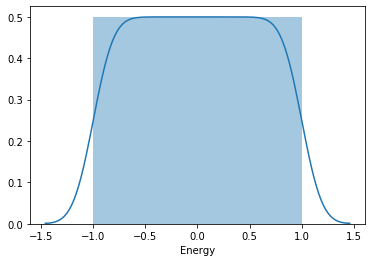

KeyError: 'Intensity'

In [120]:
for i, column in enumerate(df_concoctate.columns):
    sn.distplot(df[column])
    plt.show()